Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt

Data Loading and Preprocessing

In [ ]:
# Load the dataset
file_path = '/content/historic_demand_2009_2023_noNaN.csv'
df = pd.read_csv(file_path)

# Convert the settlement_date to a datetime index and set it as the dataframe index
df['settlement_date'] = pd.to_datetime(df['settlement_date'])
df.set_index('settlement_date', inplace=True)

# Set the frequency of the datetime index to 30 minutes
df.index = pd.DatetimeIndex(df.index).to_period('30T')
# Select the relevant demand column (assuming 'nd' is the net demand you want to forecast)
ts = df['nd']

Visualizing Time Series Data

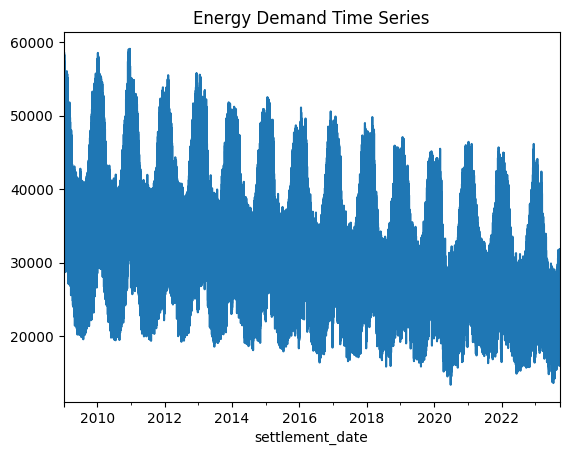

In [ ]:
ts.plot()
plt.title('Energy Demand Time Series')
plt.show()

Train-Test Split

In [ ]:
# Define the train-test split
split_ratio = 0.8
split_index = int(len(ts) * split_ratio)
train, test = ts[:split_index], ts[split_index:]

Exponential Smoothing Model

In [ ]:
# Define the Exponential Smoothing model with the use_boxcox parameter
model = ExponentialSmoothing(ts, trend="add", seasonal="add", seasonal_periods=48, use_boxcox=True)

# Fit the model
model_fit = model.fit()

Forecasting

In [ ]:
# Forecast
forecast = model_fit.forecast(steps=len(test))

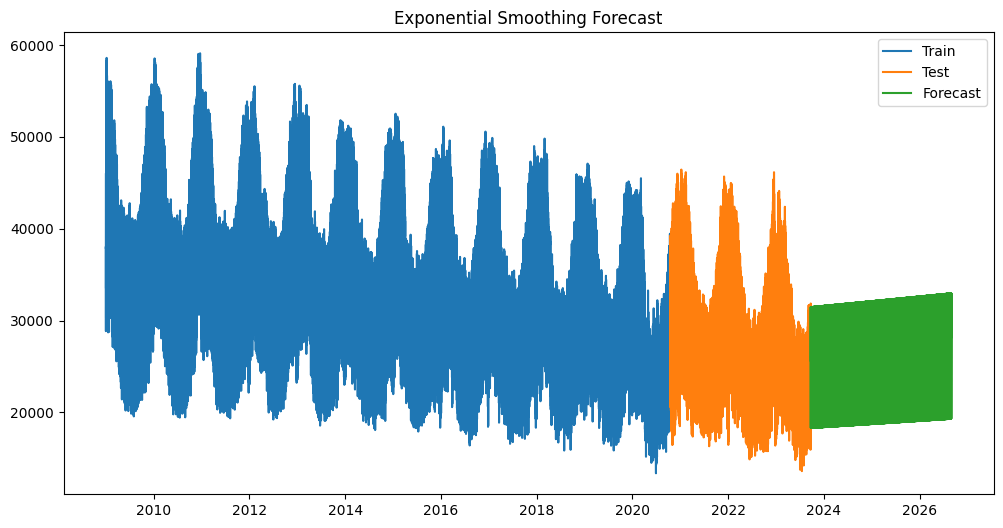

In [ ]:
# Convert Period index to timestamp if necessary for plotting
train.index = train.index.to_timestamp()
test.index = test.index.to_timestamp()
forecast.index = forecast.index.to_timestamp()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(forecast.index, forecast, label='Forecast')
plt.legend(loc='best')
plt.title("Exponential Smoothing Forecast")
plt.show()

Evaluation using RMSE

In [ ]:
# Calculate RMSE
rmse = sqrt(mean_squared_error(test, forecast))
print('RMSE:', rmse)

RMSE: 5291.644285242647


In [ ]:
combined = pd.concat([train, test, forecast], axis=1)
combined.columns = ['Actual', 'Test', 'Forecast']
combined.to_csv('energy_demand_forecast.csv')